# User Interfaces for TCLab

## Example: Manual Control

Jupyter widgets can be used to create a UI for the Temperature Control Lab. The following code is modeled after [this example of a widget operating non-blocking code](https://github.com/jupyter-widgets/ipywidgets/issues/642).

ToggleButton(value=False, button_style='danger', description='Stop')

FloatSlider(value=50.0, description='Heater 1')

FloatSlider(value=50.0, description='Heater 2')

TCLab version 0.4.9
Simulated TCLab


<IPython.core.display.Javascript object>


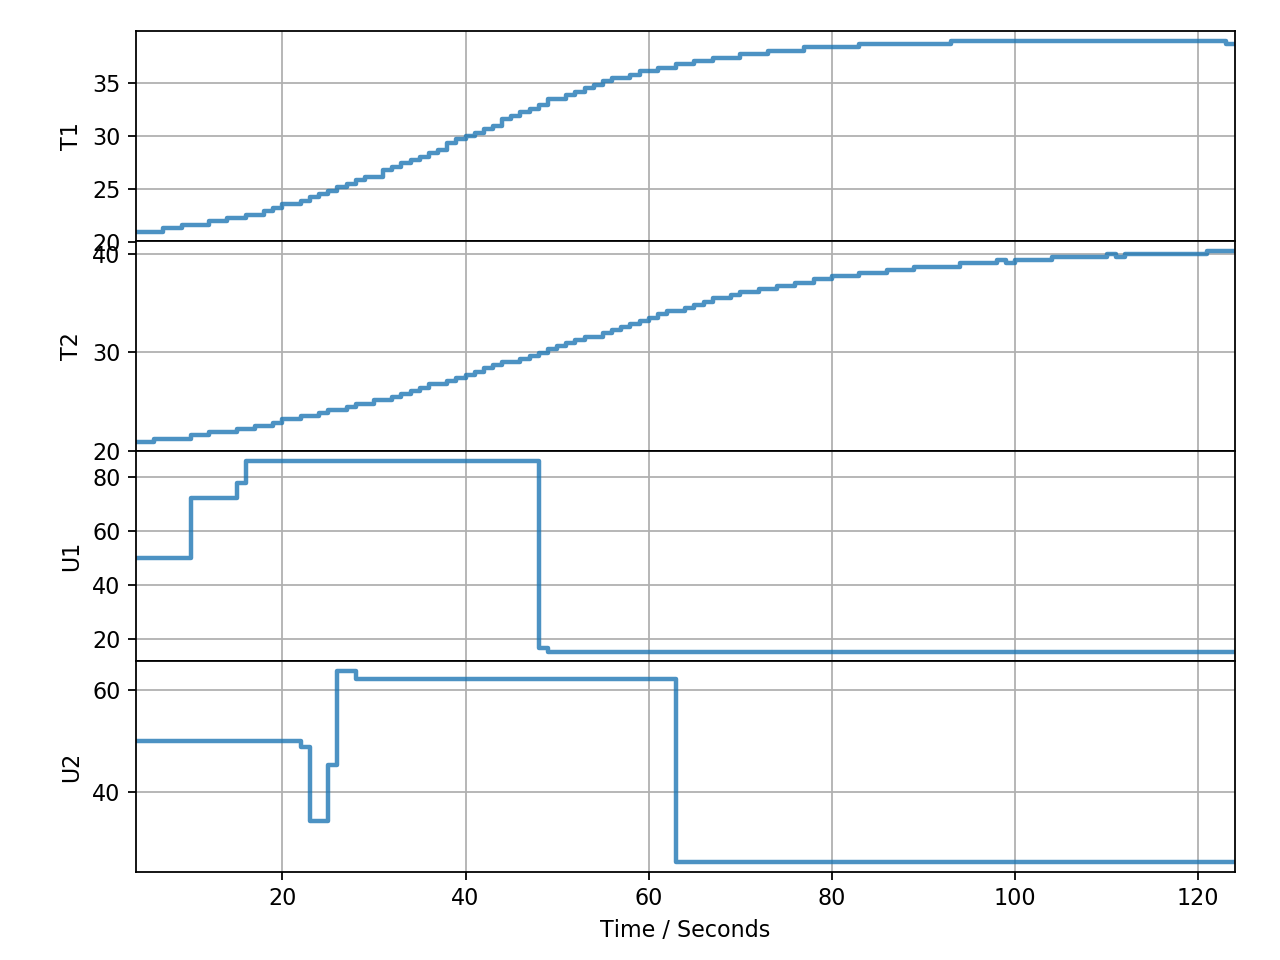

In [2]:
%matplotlib notebook

# imports
import threading
from IPython.display import display
import ipywidgets as widgets
import time

# experimental parameters
from tclab import TCLab, clock, Historian, Plotter, setup
texperiment = 600

# choose eithr on-line or off-line use
TCLab = setup(connected=False)
#TCLab = setup(connected=True)

# create UI widgets
stop = widgets.ToggleButton(value=False, description="Stop", button_style="danger")
heater1 = widgets.FloatSlider(value=50, min=0, max=100, description="Heater 1")
heater2 = widgets.FloatSlider(value=50, min=0, max=100, description="Heater 2")

# function that implements the control experiment
def work(stop, heater1, heater2):
    with TCLab() as lab:
        sources = [
            ('T1', lambda: lab.T1),
            ('T2', lambda: lab.T2),
            ('U1', lambda: lab.U1),
            ('U2', lambda: lab.U2)
        ]
        h = Historian(sources)
        p = Plotter(h)
        lab.P1 = 255
        lab.P2 = 255
        for t in clock(texperiment):
            lab.U1 = heater1.value
            lab.U2 = heater2.value
            p.update(t)
            if stop.value:
                break

# create thread
thread = threading.Thread(target=work, args=(stop, heater1, heater2))

# display UI
display(stop)
display(heater1)
display(heater2)

# start control experiment
thread.start()

## Proportional Control

ToggleButton(value=False, button_style='danger', description='Stop')

FloatSlider(value=50.0, description='Setpoint')

FloatSlider(value=50.0, description='Kp')

TCLab version 0.4.9
Simulated TCLab


<IPython.core.display.Javascript object>


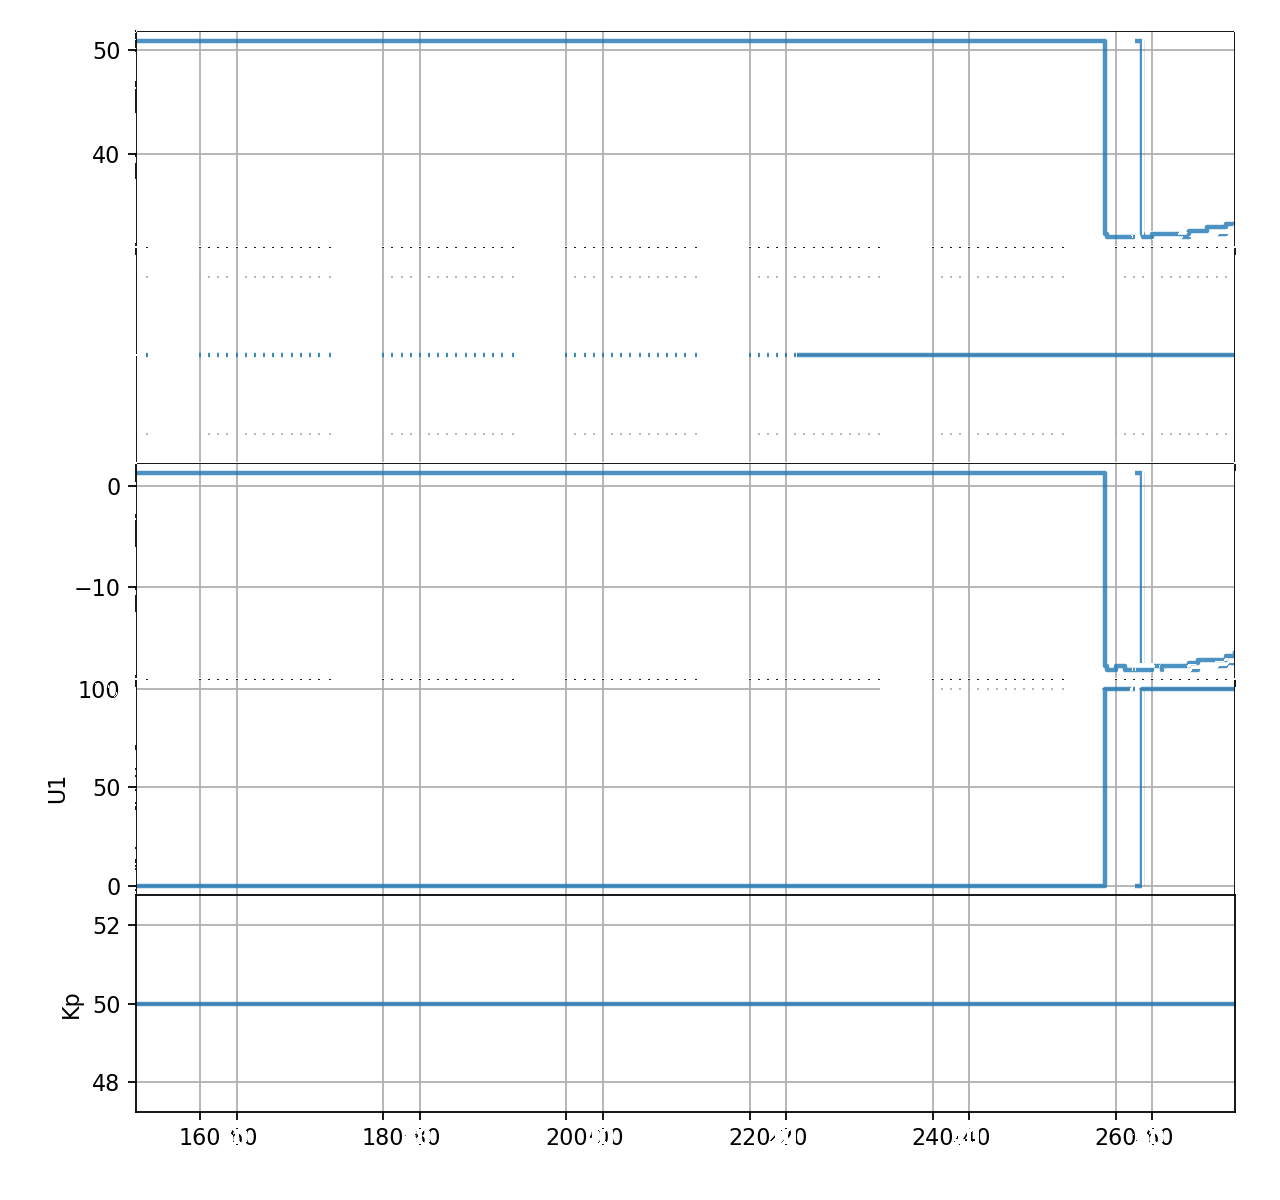

In [3]:
%matplotlib notebook

# imports
import threading
from IPython.display import display
import ipywidgets as widgets
import time

# experimental parameters
from tclab import TCLab, clock, Historian, Plotter, setup
texperiment = 600
TCLab = setup(connected=False)

# create UI widgets
stop = widgets.ToggleButton(value=False, description="Stop", button_style="danger")
setpoint = widgets.FloatSlider(value=50, min=0, max=100, description="Setpoint")
Kp = widgets.FloatSlider(value=50, min=0, max=100, description="Kp")

# function that implements the control experiment
def work(stop, setpoint, Kp):
    with TCLab() as lab:
        sources = [
            ('T1', lambda: lab.T1),
            ('Tsp', lambda: setpoint.value),
            ('e', lambda: lab.T1 - setpoint.value),
            ('U1', lambda: lab.U1),
            ('Kp', lambda: Kp.value)
        ]
        h = Historian(sources)
        p = Plotter(h)
        lab.P1 = 255
        for t in clock(texperiment):
            lab.U1 = max(0, min(100, Kp.value*(setpoint.value - lab.T1)))
            p.update(t)
            if stop.value:
                break

# create thread
thread = threading.Thread(target=work, args=(stop, setpoint, Kp))

# display UI
display(stop)
display(setpoint)
display(Kp)

# start control experiment
thread.start()

## Adding Widgets

In [1]:
%matplotlib notebook

from tclab import TCLab, clock, Historian, Plotter

import threading
from IPython.display import display
import ipywidgets as widgets
import time

stop = widgets.ToggleButton(value=False, description="Stop", button_style="danger")
setpoint = widgets.FloatSlider(value=30, min=25, max=50, step=0.2, description="Setpoint:")
power = widgets.IntSlider(value=200, min=0, max=255, description="Power")

def work(stop, setpoint, power):
    with TCLab() as lab:
        sources = [
            ('Tsp', lambda: Tsp),
            ('T1', lambda: lab.T1),
            ('P1', lambda: lab.P1),
            ('U1', lambda: lab.U1)
        ]
        h = Historian(sources)
        p = Plotter(h)
        lab.P1 = 255
        for t in clock(120):
            Tsp = setpoint.value
            lab.P1 = power.value
            lab.U1 = 100 if lab.T1 < Tsp else 0
            p.update(t)
            if stop.value:
                break

thread = threading.Thread(target=work, args=(stop, setpoint, power))
display(stop)
display(setpoint)
display(power)
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop')

FloatSlider(value=30.0, description='Setpoint:', max=50.0, min=25.0, step=0.2)

IntSlider(value=200, description='Power', max=255)

TCLab version 0.4.9
--- Serial Ports ---
/dev/cu.Bluetooth-Incoming-Port n/a n/a
/dev/cu.JeffreyKantorsAirPods-W n/a n/a


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Users/jeff/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/Users/jeff/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-1-6cd12aecb2b7>", line 15, in work
    with TCLab() as lab:
  File "/Users/jeff/opt/anaconda3/lib/python3.7/site-packages/tclab/tclab.py", line 61, in __init__
    raise RuntimeError('No Arduino device found.')
RuntimeError: No Arduino device found.

